# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [8]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

# 訓練模型

 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])


In [21]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 26s 644us/step - loss: 0.0900 - acc: 0.1241 - val_loss: 0.0893 - val_acc: 0.1613
Epoch 2/10
40000/40000 [==============================] - 24s 601us/step - loss: 0.0883 - acc: 0.1705 - val_loss: 0.0883 - val_acc: 0.2307
Epoch 3/10
40000/40000 [==============================] - 25s 626us/step - loss: 0.0863 - acc: 0.2179 - val_loss: 0.0868 - val_acc: 0.2777
Epoch 4/10
40000/40000 [==============================] - 24s 609us/step - loss: 0.0842 - acc: 0.2564 - val_loss: 0.0854 - val_acc: 0.3058
Epoch 5/10
40000/40000 [==============================] - 25s 617us/step - loss: 0.0826 - acc: 0.2858 - val_loss: 0.0844 - val_acc: 0.3279
Epoch 6/10
40000/40000 [==============================] - 25s 616us/step - loss: 0.0814 - acc: 0.3073 - val_loss: 0.0835 - val_acc: 0.3457
Epoch 7/10
40000/40000 [==============================] - 24s 599us/

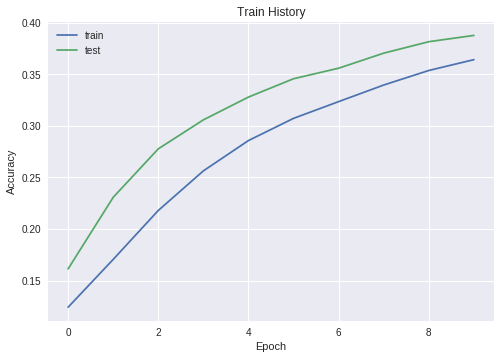

In [24]:
show_train_history('acc','val_acc')

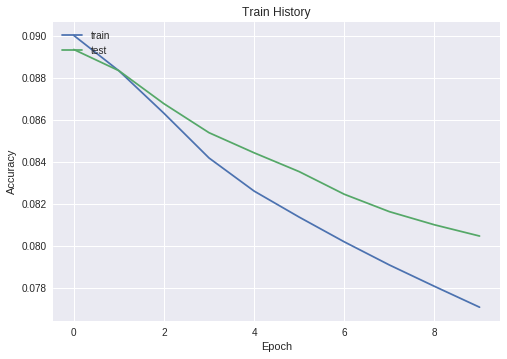

In [25]:
show_train_history('loss','val_loss')

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 26s 654us/step - loss: 0.2622 - acc: 0.9048 - val_loss: 0.2713 - val_acc: 0.9001
Epoch 2/10
40000/40000 [==============================] - 25s 628us/step - loss: 0.2505 - acc: 0.9068 - val_loss: 0.2619 - val_acc: 0.9006
Epoch 3/10
40000/40000 [==============================] - 25s 626us/step - loss: 0.2410 - acc: 0.9085 - val_loss: 0.2560 - val_acc: 0.9011
Epoch 4/10
40000/40000 [==============================] - 26s 644us/step - loss: 0.2329 - acc: 0.9109 - val_loss: 0.2480 - val_acc: 0.9018
Epoch 5/10
40000/40000 [==============================] - 26s 648us/step - loss: 0.2258 - acc: 0.9127 - val_loss: 0.2412 - val_acc: 0.9033
Epoch 6/10
40000/40000 [==============================] - 26s 646us/step - loss: 0.2195 - acc: 0.9146 - val_loss: 0.2367 - val_acc: 0.9049
Epoch 7/10
40000/40000 [==============================] - 26s 647us/step - loss: 0.2149 - acc: 0.9162 - val_loss: 0.

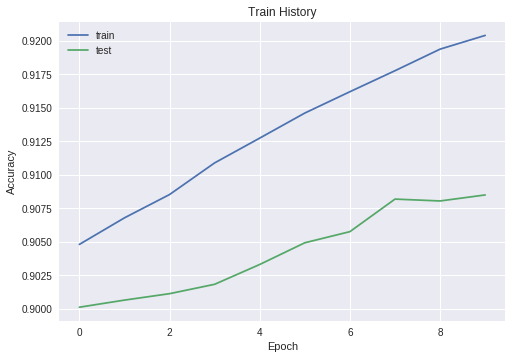

In [29]:
show_train_history('acc','val_acc')

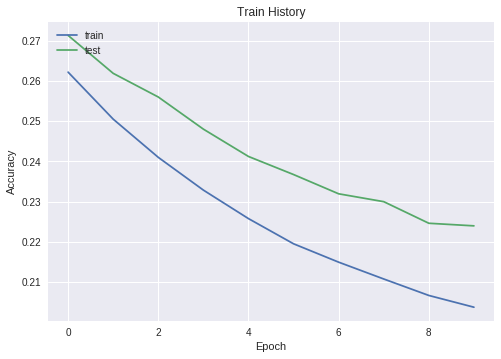

In [30]:
show_train_history('loss','val_loss')

### 使用 binary_crossentropy 當損失函數，準確度會比用 MSE 來的高
